# Math 4610 Numerical Analysis
## Quentin Higley
## Fall 2022
## Final Exam

<br>

# Table of Contents
<hr>

## Algorithms used in this notebook:

- [Bisection Method](#bisection-method)
- [Newtons Method](#newtons-method)
- [False Position Method](#false-position-method)
- [Composite Simpsons Rule](#composite-simpson-rule)
- [Gaussian Elimination](#gaussian-elimination)
- [LU Decomposition](#lu-decomposition)
- [Cholesky Decomposition](#cholesky-decomposition)
- [Infinite Norm](#infinite-norm)
- [Strictly Diagnolly Dominant](#diagnolly-dominant-matrix)
- [Spectral Radius](#spectral-radius)
- [Jacobi Iteration](#jacobi-iteration)
- [Gauss Seidel Iteration](#gauss-seidel-iteration)

## Questions:
- [Question 1](#question-1)
- [Question 2](#question-2)
- [Question 3](#question-3)
- [Question 4](#question-4)
- [Question 5](#question-5)
- [Question 6](#question-6)
- [Question 7](#question-7)

# Algorithms

<hr>

In [67]:
import numpy as np
import matplotlib.pyplot as plt

## Bisection Method

In [68]:
#Bisection Method
def bisectionMethod(f, a, b, tol=1e-3, maxIter=100) -> float:
    """
    Bisection method for finding a root of a function f in the interval [a,b].

    Args:
        f (function): function
        a (float): left endpoint of interval
        b (float): right endpoint of interval
        tol (float, optional): tolerance for stopping criterion. Defaults to 1e-3.
        maxIter (int, optional): maximum number of iterations. Defaults to 100.

    Returns:
        float: root of f(x) = 0
    """
    if f(a)*f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    for i in range(maxIter):
        c = (a + b)/2.0
        if f(c) == 0 or (b - a)/2 < tol:
            return c
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return c

## Newtons Method

In [69]:
#Newton's Method
def newtonsMethod(x0:float, f:callable, df:callable, tol:float=1e-6, maxIter:int=100) -> float:
    """
    Newton's method for finding a root of a function f.

    Args:
        x0 (float): initial guess
        f (function): function
        df (function): derivative of function
        tol (float, optional): tolerance for stopping criterion. Defaults to 1e-6.
        maxIter (int, optional): maximum number of iterations. Defaults to 100.

    Returns:
        float: root of f(x) = 0
    """

    xn = x0
    for i in range(maxIter):
        fxn = f(xn)
        if abs(fxn) < tol:
            return xn
        dfxn = df(xn)
        if dfxn == 0:
            return None
        xn = xn - fxn/dfxn
    return xn

## False Position Method

In [70]:
#False Position Method
def falsePosition(f:callable, a:float, b:float, tol:float=1e-6, maxiter:int=100) -> float:
    """
    Calculate the root of a function f in the interval [a,b] using the false position method.

    Args:
        f (function): function
        a (float): lower bound of interval
        b (float): upper bound of interval
        tol (float, optional): error tolerance. Defaults to 1e-6.
        maxiter (int, optional): max iterations. Defaults to 100.

    Returns:
        float: root of f(x) = 0
    """
    for i in range(maxiter):
        fa = f(a)
        fb = f(b)
        c = a - fa*(b-a)/(fb-fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fa*fc < 0:
            b = c
        else:
            a = c
    return c

## Composite Simpsons Rule

In [71]:
#Composite Simpson's Rule
def compositeSimpson(f:callable, a:float, b:float, n:int) -> float:
    """
    Composite Simpson's rule for numerical integration.

    Args:
        f (function): function to integrate
        a (float): lower bound of integration
        b (float): upper bound of integration
        n (int): number of subintervals must be even.

    Returns:
        float: integral of f from a to b
    """
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h / 3 * np.sum(y[0:-1:2] + 4 * y[1::2] + y[2::2])

## Gaussian Elimination

In [72]:
#Gaussian Elimination
def GaussianElimination(A: np.array)-> np.array:
    """
    Guassian elimination for solving linear systems.

    Args:
        A (np.array): augmented matrix to be solved

    Raises:
        ValueError: matrix is singular

    Returns:
        np.array: solution vector
    """
    A = A.astype(float)
    m, n = A.shape
    n -= 1
    x = np.zeros(A.shape[0])

    for i in range(n):
        p = np.argmin(np.abs(np.ma.masked_where(A[i:, i] == 0, A[i:, i]))) + i
        if A[p, i] == 0:
            raise ValueError('Matrix is not singular')
        if p != i:
            A[[i, p]] = A[[p, i]]
        for j in range(i+1, n):
            A[j] = A[j] - A[i] * (A[j, i] / A[i, i])
    if A[n-1, n-1] == 0:
        raise ValueError('Matrix is not singular')
    x[n-1] = A[n-1, n] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        x[i] = (A[i, n] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]
    return x

## LU Decomposition

In [73]:
#LU Decomposition
def LUdecomposition(A)-> list[np.array, np.array]:
    """
    Computes the LU decomposition of a square matrix A.

    Args:
        A (np.array): square matrix

    Returns:
        list[np.array, np.array]: list of lower and upper triangular matrices
    """
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
        for j in range(i, n):
            if i == j:
                L[i, i] = 1
            else:
                L[j, i] = (A[j, i] - np.dot(L[j, :i], U[:i, i]))/U[i, i]
    return L, U

## Cholesky Decomposition

In [74]:
#Cholesky Decomposition
def CholeskyDecomposition(A:np.array)-> list[np.array, np.array]:
    """
    Compute the Cholesky decomposition of a square matrix.

    Args:
        A (np.array): array to be decomposed

    Returns:
        list: list containing L and L^T
    """
    n, m = A.shape
    if n != m:
        return
    l = np.zeros((n, n))
    l[0, 0] = np.sqrt(A[0, 0])

    for i in range(1, n):
        l[i, 0] = A[i, 0]/l[0, 0]

    for i in range(1, n-1):
        l[i, i] = np.sqrt(A[i, i] - np.dot(l[i, :i], l[i, :i]))
        for j in range(i+1, n):
            l[j, i] = (A[j, i] - np.dot(l[j, :i], l[i, :i]))/l[i, i]
    l[n-1, n-1] = np.sqrt(A[n-1, n-1] - np.dot(l[n-1, :n-1], l[n-1, :n-1]))
    return l, np.transpose(l)

## Infinite Norm

In [75]:
#Infinite Norm
def infNorm(A:np.array)->float:
    """
    Calculates the infinite norm of a matrix

    Args:
        A (np.array): matrix to be checked

    Returns:
        float: infinite norm of matrix
    """
    column_sums = [sum(abs(A[:, i])) for i in range(A.shape[1])]
    return max(column_sums)

## Strictly Diagnolly Dominant Matrix

In [76]:
#Strictly Diagonally Dominant
def isDiagonallyDominant(A)->bool:
    """
    checks if array is strictly diagonally dominant

    Args:
        A (np.array): array to be checked

    Returns:
        bool: True if array is strictly diagonally dominant, False otherwise
    """
    for i in range(A.shape[0]):
        if abs(A[i, i]) < np.sum(abs(A[i, :])) - abs(A[i, i]):
            return False
    return True

## Spectral Radius

In [77]:
#Spectral Radius
def spectralRadius(A: np.array)-> float:
    """
    computes the spectral radius of a matrix

    Args:
        A (np.array): matrix to be checked

    Raises:
        ValueError: matrix must be square

    Returns:
        float: spectral radius of matrix
    """
    if A.shape[0] != A.shape[1]:
        raise ValueError("Matrix must be square")
    return np.max(np.abs(np.linalg.eigvals(A)))

## Jacobi Iteration

In [78]:
#Jacobi Iteration
def JacobiIteration(A: np.array, b: np.array, tol: float = 1e-10, maxIter: int = 1000)-> np.array:
    """
    computes the solution to a linear system using the Jacobi iteration method

    Args:
        A (np.array): A matrix
        b (np.array): b vector
        tol (float, optional): tolerance. Defaults to 1e-10.
        maxIter (int, optional): max number of iterations. Defaults to 1000.

    Returns:
        np.array: solution vector
    """
    A = np.array(A, dtype=np.float64)
    x = np.ones_like(b, dtype=np.float64)  # initial guess
    #x = np.zeros_like(b, dtype=np.float64)  # initial guess
    T = A - np.diag(np.diag(A))  # T = A - D
    for k in range(maxIter):
        x_old = x.copy()
        x[:] = (b - np.dot(T, x)) / np.diag(A)
        if np.linalg.norm(x - x_old, np.inf) < tol:
            return x
    return x

## Gauss Seidel Iteration

In [79]:
#Gauss-Seidel Iteration
def GaussSeidelIteration(A: np.array, b: np.array, tol: float = 1e-10, maxIter: int = 1000)-> np.array:
    """
    Computes the solution to a linear system using the Gauss-Seidel iteration method

    Args:
        A (np.array): A matrix
        b (np.array): b vector
        tol (float, optional): tolerance. Defaults to 1e-10.
        maxIter (int, optional): max number of iterations. Defaults to 1000.

    Returns:
        np.array: solution vector
    """
    A = np.array(A, dtype=np.float64)
    x = np.ones_like(b, dtype=np.float64)  # initial guess
    #x = np.zeros_like(b, dtype=np.float64)  # initial guess
    i = 0
    for k in range(maxIter):
        i += 1
        x_old = x.copy()
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i, :i], x[:i]) -
                    np.dot(A[i, i+1:], x_old[i+1:])) / A[i, i]
        if np.linalg.norm(x - x_old, np.inf) < tol:
            return x
    return x

# Questions

<hr>

##  Question 1

1. The equation $f(x) = 2−x^2 sinx = 0$ has a solution in the interval $[− 1 ,2]$.

    a. Verify that the Bisection method can be applied to the function $f(x)$ on $[− 1 ,2]$.

    b.Using the error formula for the Bisection method find the number of iterations needed for accuracy $0.000001$. Do not do the Bisection calculations.

    c. Compute $p_3$ for the Bisection method.

a. To be able to use the Bisection method $f(x)[a,b] \in C[a,b]$ and $f(a)f(b) < 0$.

Since $f$ is continuous on its domain $[− 1 ,2]$ we only need to check that $f(a)f(b) < 0$.

$$ f(-1) = 2.84147098481 $$
$$ f(2) = −1.6371897073 $$

because $f(-1)f(2) < 0$ we can use the Bisection method on $f(x)$ on $[− 1 ,2]$.

<br>
<br>

b. To find the number of iterations needed for accuracy $0.000001$ we use the formula:

$$|p_n - p_{n-1}| < \frac{b - a}{2^n}$$

$$|p_n - p_{n-1}| = 0.000001,\:b=2,\:a=-1$$

$$\implies \frac{3}{2^{n}} \le 10^{-5}$$

$$\implies 2^{-n} \le \frac{1}{300000}$$

$$\implies -n ln(2) \le ln(\frac{1}{300000})$$

$$\implies n \ge \frac{ln(300000)}{ln(2)}$$

$$\implies n \ge 18.1946$$

Since $n$ must be an integer, there needs to be at least $19$ iterations.

<br>
<br>

c. To find $p_3$ use the bisection method with a max iterations of 3.

The estimation of the root at p_3 is:  1.625


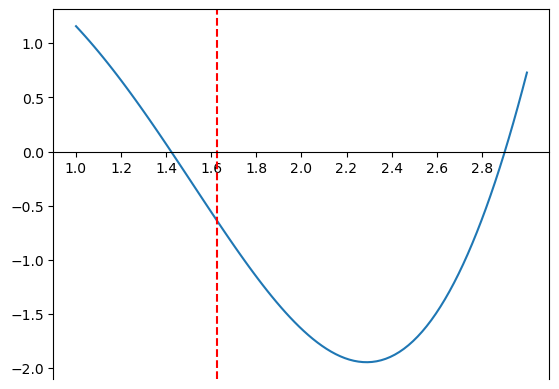

In [80]:
def f(x):
    return 2 - np.power(x, 2) * np.sin(x)

bm = bisectionMethod(f, -1, 2, 0.1, 3)
print(f"The estimation of the root at p_3 is: ",bm)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.set_xticks(np.arange(0, 3, .2))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(np.linspace(1.0001, 3, 100), f(np.linspace(1.0001, 3, 100)))
plt.axvline(x=bm, color='r', linestyle='--')



##  Question 2

2. Use two methods of your choice from Section 2.3 to find the solutions to within $10^{-5}$ for the following problem:
$$ln(x−1) + cos(x−1) = 0,\: 1.3 \le x \le 2 $$

To use Newtons method, $f \in C^2[a,b]$
$$\frac{d}{dx}f(x) = \frac{1}{x-1}-sin(x-1)$$
$$\frac{d^2}{dx^2}f(x) = -\frac{1}{(x-1)^2}-cos(x-1)$$

Since $f^2$ is continuous on $[1.3,2]$ we can use Newtons method.

To use the False Position method, $f(p_0)f(p_1) < 0$.
$$let\:p_0 = 1.3,\:and\:p_1 = 2$$
$$f(p_0) = −0.2486363152,\:f(p_1) = 0.540302305868$$
since $f(p_0)f(p_1) < 0$ we can use the False Position method.

The estimation of the root using newtons method:  1.3977481644736214
The estimation of the root using false position:  1.3977509211516925


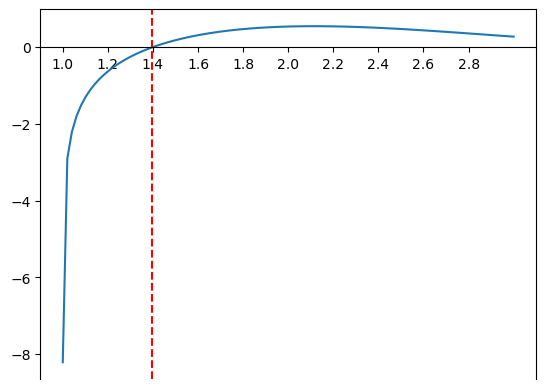

In [81]:
def f(x):
    return np.log(x-1) + np.cos(x-1)
def df(x):
    return 1/(x-1) - np.sin(x-1)

nm = newtonsMethod(1.3, f, df, 1e-5, 100)
fp = falsePosition(f, 1.3, 2, 1e-5, 100)

print(f"The estimation of the root using newtons method: ",nm)
print(f"The estimation of the root using false position: ",fp)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.set_xticks(np.arange(0, 3, .2))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(np.linspace(1.0001, 3, 100), f(np.linspace(1.0001, 3, 100)))
plt.axvline(x=nm, color='r', linestyle='--')


##  Question 3

3. Let $f(x) =x\:lnx+x^4$

    a. Approximate $$\begin{align*} \int_1^3 f(x)\:dx \end{align*}$$ using Composite Simpsons rule with $n= 4$.

    b. Find the smallest upper bound for the absolute error using the error formula.

    c. Find the values of n required for an error of at most $0.00001$.

a. To use the Composite Simpsons rule, $f \in C^4[a,b]$.

$$\frac{d}{dx}(f(x)) = ln(x) + 1 + 4x^3$$
$$\frac{d^2}{dx^2}(f(x)) = \frac{1}{x} + 12x^2$$
$$\frac{d^3}{dx^3}(f(x)) = -\frac{1}{x^2} + 24x$$
$$\frac{d^4}{dx^4}(f(x)) = \frac{2}{x^3} + 24$$

Since $f^4$ is continuous on $[1,3]$ we can use the Composite Simpsons rule.

In [82]:
def f(x):
    return x * np.log(x) + np.power(x, 4)
def d4f(x):
    return 2*np.power(x, -3) + 24
print(compositeSimpson(f, 1, 3, 4))

51.36068725927244


b. To find the smallest upper bound for the absolute error using the error formula, $f \in C^4[a,b]$. Since $f \in C^4[a,b]$, we can use the error formula:

$$\frac{b-a}{180}h^4f^4(\mu),\; h = \frac{b-a}{n}$$

by looking at the graph of $f^4$, the largest value of $f^4(\mu)$ is at $f^4(1) = 26$

$h = \frac{3-1}{4} = \frac{2}{4} = \frac{1}{2}$

$$\implies \frac{1}{180}*\frac{1}{2^4}*26 \le 10^{-n}$$

$$\implies \frac{26}{2880} \le 10^{-n}$$

$$\implies ln(\frac{26}{2880}) \le -nln(10)$$

$$\implies n \ge \frac{ln(\frac{26}{2880})}{ln(10)}$$

$$\implies n \ge 2.04441913979$$

This implies that the smallest upper bound for the absolute error is $10^{-2.04441913979}$ or $0.00902777777774$.

<br>
<br>

c. To find the values of n required for an error of at most $0.00001$, we use the error formula:

$$\frac{b-a}{180}h^4f^4(\mu),\; h = \frac{b-a}{n}$$

the largest value of $f^4(\mu)$ is at $f^4(1) = 26$

$$\implies \frac{2 h ^4}{180}*26 \le 0.00001$$

$h = \frac{2}{n}$

$$\implies \frac{32}{180*n^4}*26 \le 0.00001$$

$$\implies  32 \le \frac{0.00001(180n^4)}{26}$$

$$\implies  32 \le \frac{0.0018}{26}n^4$$

$$\implies  \frac{32*26}{0.0018} \le n^4$$

$$\implies \sqrt[4]{\frac{32*26}{0.0018}} \le n$$

$$\implies \sqrt[4]{462222.222222} \le n$$

$$\implies  26.0743028378 \le n$$

Because n must be an even integer, we need to round up to 28.

##  Question 4

4. Let $A = \begin{bmatrix}
   1 & -1 & 2\\
   -1 & 2 & -4\\
   2 & -4 & 9
\end{bmatrix}$ and $b = \begin{bmatrix}
   -1\\
   4\\
   -9
\end{bmatrix}$

   a. Factor the matrix $A$ using your choice of factorizations

   b. Using the factorization obtained in a. solve the system $Ax=b$.

a. If Gaussian elimination can used without row interchanges, the matrix $A$ can be factored into $LU$.

In [83]:
A = np.array([[1, -1, 2], [-1, 2, -4], [2, -4, 9]])
b = np.array([-1, 4, -9])

A = np.hstack((A, b.reshape(3, 1)))
print(GaussianElimination(A))

[ 2.  1. -1.]


Thus $A$ can be factored into $LU$.

In [84]:
#a 
A = np.array([[1, -1, 2], [-1, 2, -4], [2, -4, 9]])
b = np.array([-1, 4, -9])

L, U = LUdecomposition(A)

print("L = \n", L)
print("U = \n", U)

#b
L = np.hstack((L, b.reshape(3, 1)))
y  = GaussianElimination(L)

U = np.hstack((U, y.reshape(3, 1)))
x = GaussianElimination(U)
print("x = \n", x)

L = 
 [[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 2. -2.  1.]]
U = 
 [[ 1. -1.  2.]
 [ 0.  1. -2.]
 [ 0.  0.  1.]]
x = 
 [ 2.  1. -1.]


##  Question 5

5. Let $A = \begin{bmatrix}
   3 & -2 & 0\\
   -2 & 4 & -1\\
   0 & 1 & 2
\end{bmatrix}$ and $b = \begin{bmatrix}
   2\\
   1\\
   -2
\end{bmatrix}$

    a. Find the first two iterations using the Jacobi method with $x(0) = (1, 1, 1)^t$.

    b. Find the first two iterations using the Gauss-Seidel method with $x(0) = (1, 1, 1)^t$.

    c. Will the Jacobi method converge for this linear system? Why or why not?

In [85]:
A = np.array([[3, -2, 0], [-2, 4, -1], [0, 1, 2]])
b = np.array([2, 1, -2])

print("1st iteration: ", JacobiIteration(A, b, maxIter=1))
print("2nd iteration: ", JacobiIteration(A, b, maxIter=2))

1st iteration:  [ 1.33333333  1.         -1.5       ]
2nd iteration:  [ 1.33333333  0.54166667 -1.5       ]


In [86]:
A = np.array([[3, -2, 0], [-2, 4, -1], [0, 1, 2]])
b = np.array([2, 1, -2])

print("1st iteration: ", GaussSeidelIteration(A, b, maxIter=1))
print("2nd iteration: ", GaussSeidelIteration(A, b, maxIter=2))

1st iteration:  [ 1.33333333  1.16666667 -1.58333333]
2nd iteration:  [ 1.44444444  0.57638889 -1.28819444]


Using thm. 7.21, if A is strictly diagonally dominant, then both the Jacobi and Gauss-Seidel method will converge to a unique solution to $Ax = b$ for any initial guess $x^{(0)}$.

To show that A is strictly diagonally dominant, we need to show that the absolute value of the diagonal element is greater than the sum of the absolute values of the other elements in the row.

Row 1: $3 > | -2 | + | 0 | = 2$

Row 2: $4 > | -2 | + | -1 | = 3$

Row 3: $2 > | 0 | + | 1 | = 1$

Therefore, $A$ is strictly diagonally dominant and both the Jacobi and Gauss-Seidel method will converge to a unique solution to $Ax = b$ for any initial guess $x^{(0)}$.


##  Question 6

6. Let $A = \begin{bmatrix}
   1 & 0 & -1\\
   0 & 1 & 1\\
   -1 & 1 & \alpha
\end{bmatrix}$

find all values of $\alpha$ for which:

   a. $A$ is singular

   b. $A$ is strictly diagonally dominant

   c. $A$ is positive definite

a. A matrix is singular if its determinant is zero.

$$Det(A) = (\alpha - 1) - 0 - (0+1)$$

$$\implies (\alpha - 2) = 0$$

$$\implies \alpha = 2$$

Matrix $A$ is singular when $\alpha = 2$.

<br>
<br>

A matrix is strictly diagonally dominant if the absolute value of the diagonal element is greater than the sum of the absolute values of the other elements in the row.

In its current form $A$ is not strictly diagonally dominant. However if some row operations are performed, then $A$ can be made strictly diagonally dominant.

$$\begin{bmatrix}
   1 & 0 & -1\\
   0 & 1 & 1\\
   -1 & 1 & \alpha
\end{bmatrix}$$

$$R_3 = R_3 + R_1 - R_2$$


$$\begin{bmatrix}
   1 & 0 & -1\\
   0 & 1 & 1\\
   0 & 0 & \alpha - 2
\end{bmatrix}$$

$$R_3 = \frac{1}{2}R_3$$

$$\begin{bmatrix}
   1 & 0 & -1\\
   0 & 1 & 1\\
   0 & 0 & \frac{\alpha}{2} - 1
\end{bmatrix}$$

$$R_1 = R_1 - R_3$$

$$R_2 = R_2 + R_3$$

$$\begin{bmatrix}
   1 & 0 & -\frac{\alpha}{2}\\
   0 & 1 & \frac{\alpha}{2}\\
   0 & 0 & \frac{\alpha}{2} + 1
\end{bmatrix}$$

Since the requirement to be diagonally dominant is that the absolute value of the diagonal element is greater than the sum of the absolute values of the other elements in the row, we can see that the matrix is strictly diagonally dominant when |$\alpha| < 2$.

<br>
<br>

c. A matrix is positive definite if $x^TAx > 0$ for all non-zero vectors $x$.

$$[x_1, x_2, x_3] * \begin{bmatrix} 1 & 0 & -1\\ 0 & 1 & 1\\ -1 & 1 & \alpha \end{bmatrix} * \begin{bmatrix}x_1\\ x_2\\ x_3\end{bmatrix} > 0$$

$$\implies [x_1, x_2, x_3] * \begin{bmatrix} x_1 + 0x_2 - x_3\\ 0x_1 + x_2 + x_3\\ -x_1 + x_2 + \alpha x_3 \end{bmatrix} > 0$$

$$\implies x_1(x_1-x_3) + x_2(x_2+x_3) + x_3(-x_1+x_2+\alpha x_3) > 0$$

$$\implies x_1^2 - x_1x_3 + x_2^2 + x_2x_3 - x_1x_3 +x_2x_3 + \alpha x_3^2 > 0$$

$$\implies x_1^2 + x_2^2 + \alpha x_3^2 -2x_1x_3 + 2x_2x_3 > 0$$

$$\implies \alpha x_3^2 > 2x_1x_3 - 2x_2x_3 - x_1^2 - x_2^2$$

$$\implies \alpha > \frac{2x_1x_3 - 2x_2x_3 - x_1^2 - x_2^2}{x_3^2}$$

Thus the values of $\alpha$ for which $A$ is positive definite are $\alpha > \frac{2x_1x_3 - 2x_2x_3 - x_1^2 - x_2^2}{x_3^2}$ for all non-zero vectors $x$.


In [87]:
#check the determinant of the matrix
A = np.array([[1, 0, -1], [0, 1, 1], [-1, 1, 2]])
print("determinant of A", np.linalg.det(A))

#check if the matrix is strictly diagonally dominant
a = 1.99
A = np.array([[1, 0, a/2], [0, 1, -a/2], [0, 0, a/2 + 1]])
print("is A diagonally dominant when a = 1.99: ", isDiagonallyDominant(A))
a=-1.99
A = np.array([[1, 0, a/2], [0, 1, -a/2], [0, 0, a/2 + 1]])
print("is A diagonally dominant when a = -1.99: ", isDiagonallyDominant(A))
a=0
A = np.array([[1, 0, a/2], [0, 1, -a/2], [0, 0, a/2 + 1]])
print("is A diagonally dominant when a = 0: ", isDiagonallyDominant(A))

determinant of A 0.0
is A diagonally dominant when a = 1.99:  True
is A diagonally dominant when a = -1.99:  True
is A diagonally dominant when a = 0:  True


##  Question 7

7. Let $A = \begin{bmatrix}
   8 & 1 & 0\\
   1 & 4 & -2\\
   0 & -2 & 8
\end{bmatrix}$

    a. Find $\|A\|_{\infin}$
    
    b. Find $\rho (A)$

a. To find $\|A\|_{\infin}$, we find the largest row sum of each absolute value of the elements in the matrix.

Row 1, $8 + 1 + 0 = 9$

Row 2, $1 + 4 + 2 = 7$

Row 3, $0 + 2 + 8 = 10$

$\implies$ $\|A\|_{\infin} = 10$

<br>
<br>

b. To find $\rho (A)$, we find the largest eigenvalue of the matrix.
To find the eigenvalues of a matrix, we use the characteristic equation, $det(A -\lambda I)$.

$$\begin{vmatrix}
   8 - \lambda & 1 & 0\\
   1 & 4 - \lambda & -2\\
   0 & -2 & 8 - \lambda
\end{vmatrix} = 0$$

$$Det(A) = (8-\lambda)((4-\lambda)(8-\lambda) - 4) - (8-\lambda)$$

$$\implies -x^3+20x^2-123x+216 = 0$$
using synthetic division, we get the roots of the equation.

$3$ | $-1$ | $20$ | $-123$ | $216$
---|---|---|---|---
 | | | $-3$ | $51$ | $-216$
| | $-1$ | $17$ | $-72$ | $0$

$$\implies -(x-1)(x^2-17x+72)$$

$$\implies -(x-1)(x-8)(x-9)$$

$$\implies x = 3, 8, 9$$

$$\implies \rho (A) = 9$$

The estimation of the roots using newtons method:  [3, 8, 9]
The infinite norm is:  10
The spectral radius is:  9.000000000000002


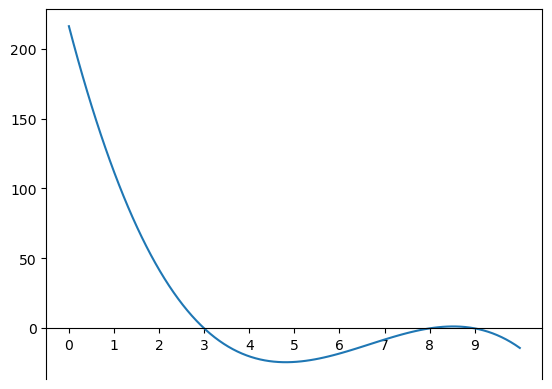

In [88]:
def f(x):
    return -1 * np.power(x, 3) + 20*np.power(x, 2) -123*x + 216
def df(x):
    return -3*np.power(x, 2)+40*x-123


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')
ax.set_xticks(np.arange(0, 10, 1))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(np.linspace(0, 10, 100), f(np.linspace(0, 10, 100)))

def df(x):
    return -3*np.power(x, 2)+40*x-123

nm = [newtonsMethod(3, f, df, 1e-15, 1000),
newtonsMethod(8, f, df, 1e-15, 1000),
newtonsMethod(9, f, df, 1e-15, 1000)]

print("The estimation of the roots using newtons method: ", nm)

A = np.array([[8, 1, 0], [1, 4, -2], [0, -2, 8]])

print("The infinite norm is: ",infNorm(A))
print("The spectral radius is: ", spectralRadius(A))